Restaurant Order Analysis

I have 2 flat files to analyse: orders.csv & menu_items.csv. I need to use both to answer the following questions.

1. What items drive the most and least revenue?
2. Which time periods have the highest and lowest revenue?

In [6]:
# Importing the Orders file

In [8]:
import pandas as pd

In [140]:
orders_df = pd.read_csv('order_details.csv', )

In [142]:
# Looking at the fields
orders_df.head()

,order_details_id,order_id,order_date,order_time,item_id
0,1,1,1/1/23,11:38:36 AM,109.0
1,2,2,1/1/23,11:57:40 AM,108.0
2,3,2,1/1/23,11:57:40 AM,124.0
3,4,2,1/1/23,11:57:40 AM,117.0
4,5,2,1/1/23,11:57:40 AM,129.0


In [144]:
# Looking at the data types
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12234 entries, 0 to 12233
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  12234 non-null  int64  
 1   order_id          12234 non-null  int64  
 2   order_date        12234 non-null  object 
 3   order_time        12234 non-null  object 
 4   item_id           12097 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 478.0+ KB


In [146]:
# Cleaning up missing rows

orders_df = orders_df.dropna()

In [148]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12097 entries, 0 to 12233
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  12097 non-null  int64  
 1   order_id          12097 non-null  int64  
 2   order_date        12097 non-null  object 
 3   order_time        12097 non-null  object 
 4   item_id           12097 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 567.0+ KB


In [150]:
order_timestamp = pd.to_datetime(orders_df["order_date"] + ' ' + orders_df["order_time"], format="%m/%d/%y %I:%M:%S %p")

In [160]:
orders_df.insert(0, "order_timestamp", order_timestamp)

ValueError: cannot insert order_timestamp, already exists

In [162]:
orders_df = orders_df.drop(["order_date", "order_time"], axis= 1)

In [166]:
orders_df

,order_timestamp,order_details_id,order_id,item_id
0,2023-01-01 11:38:36,1,1,109.0
1,2023-01-01 11:57:40,2,2,108.0
2,2023-01-01 11:57:40,3,2,124.0
3,2023-01-01 11:57:40,4,2,117.0
4,2023-01-01 11:57:40,5,2,129.0
...,...,...,...,...
12229,2023-03-31 22:05:04,12230,5369,109.0
12230,2023-03-31 22:05:04,12231,5369,129.0
12231,2023-03-31 22:05:04,12232,5369,120.0
12232,2023-03-31 22:05:04,12233,5369,122.0


In [168]:
# Joining Menu Items

menu_df = pd.read_csv('menu_items.csv')

menu_df.head()

,menu_item_id,item_name,category,price
0,101,Hamburger,American,12.95
1,102,Cheeseburger,American,13.95
2,103,Hot Dog,American,9.00
3,104,Veggie Burger,American,10.50
4,105,Mac & Cheese,American,7.00


In [170]:
menu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   menu_item_id  32 non-null     int64  
 1   item_name     32 non-null     object 
 2   category      32 non-null     object 
 3   price         32 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB


In [172]:
order_items_df = orders_df.merge(menu_df, how='left', left_on='item_id', right_on='menu_item_id')

order_items_df.head()

,order_timestamp,order_details_id,order_id,item_id,menu_item_id,item_name,category,price
0,2023-01-01 11:38:36,1,1,109.0,109,Korean Beef Bowl,Asian,17.95
1,2023-01-01 11:57:40,2,2,108.0,108,Tofu Pad Thai,Asian,14.50
2,2023-01-01 11:57:40,3,2,124.0,124,Spaghetti,Italian,14.50
3,2023-01-01 11:57:40,4,2,117.0,117,Chicken Burrito,Mexican,12.95
4,2023-01-01 11:57:40,5,2,129.0,129,Mushroom Ravioli,Italian,15.50


In [174]:
order_items_df.drop('menu_item_id', axis=1)

,order_timestamp,order_details_id,order_id,item_id,item_name,category,price
0,2023-01-01 11:38:36,1,1,109.0,Korean Beef Bowl,Asian,17.95
1,2023-01-01 11:57:40,2,2,108.0,Tofu Pad Thai,Asian,14.50
2,2023-01-01 11:57:40,3,2,124.0,Spaghetti,Italian,14.50
3,2023-01-01 11:57:40,4,2,117.0,Chicken Burrito,Mexican,12.95
4,2023-01-01 11:57:40,5,2,129.0,Mushroom Ravioli,Italian,15.50
...,...,...,...,...,...,...,...
12092,2023-03-31 22:05:04,12230,5369,109.0,Korean Beef Bowl,Asian,17.95
12093,2023-03-31 22:05:04,12231,5369,129.0,Mushroom Ravioli,Italian,15.50
12094,2023-03-31 22:05:04,12232,5369,120.0,Steak Torta,Mexican,13.95
12095,2023-03-31 22:05:04,12233,5369,122.0,Chips & Salsa,Mexican,7.00


In [176]:
# Adding Tax (8%) & Total Revenue Columns

order_items_df['sales_tax'] = (order_items_df.price * 0.08).round(2)

In [178]:
order_items_df

,order_timestamp,order_details_id,order_id,item_id,menu_item_id,item_name,category,price,sales_tax
0,2023-01-01 11:38:36,1,1,109.0,109,Korean Beef Bowl,Asian,17.95,1.44
1,2023-01-01 11:57:40,2,2,108.0,108,Tofu Pad Thai,Asian,14.50,1.16
2,2023-01-01 11:57:40,3,2,124.0,124,Spaghetti,Italian,14.50,1.16
3,2023-01-01 11:57:40,4,2,117.0,117,Chicken Burrito,Mexican,12.95,1.04
4,2023-01-01 11:57:40,5,2,129.0,129,Mushroom Ravioli,Italian,15.50,1.24
...,...,...,...,...,...,...,...,...,...
12092,2023-03-31 22:05:04,12230,5369,109.0,109,Korean Beef Bowl,Asian,17.95,1.44
12093,2023-03-31 22:05:04,12231,5369,129.0,129,Mushroom Ravioli,Italian,15.50,1.24
12094,2023-03-31 22:05:04,12232,5369,120.0,120,Steak Torta,Mexican,13.95,1.12
12095,2023-03-31 22:05:04,12233,5369,122.0,122,Chips & Salsa,Mexican,7.00,0.56


In [180]:
order_items_df['total_revenue'] = (order_items_df['price'] + order_items_df['sales_tax'])

In [182]:
order_items_df.head()

,order_timestamp,order_details_id,order_id,item_id,menu_item_id,item_name,category,price,sales_tax,total_revenue
0,2023-01-01 11:38:36,1,1,109.0,109,Korean Beef Bowl,Asian,17.95,1.44,19.39
1,2023-01-01 11:57:40,2,2,108.0,108,Tofu Pad Thai,Asian,14.50,1.16,15.66
2,2023-01-01 11:57:40,3,2,124.0,124,Spaghetti,Italian,14.50,1.16,15.66
3,2023-01-01 11:57:40,4,2,117.0,117,Chicken Burrito,Mexican,12.95,1.04,13.99
4,2023-01-01 11:57:40,5,2,129.0,129,Mushroom Ravioli,Italian,15.50,1.24,16.74


In [184]:
# Analysing the worst selling items.

(order_items_df
 .groupby('item_name')
 .aggregate({'total_revenue': 'sum'})
 .sort_values('total_revenue')
 .head()
)

,total_revenue
item_name,
Chicken Tacos,1587.93
Potstickers,1992.60
Chips & Guacamole,2303.64
Hot Dog,2498.04
Cheese Quesadillas,2642.22


In [186]:
# Analysing the best selling items.

(order_items_df
 .groupby('item_name')
 .aggregate({'total_revenue': 'sum'})
 .sort_values('total_revenue', ascending=False)
 .head()
)

,total_revenue
item_name,
Korean Beef Bowl,11401.32
Spaghetti & Meatballs,9113.30
Tofu Pad Thai,8800.92
Cheeseburger,8785.81
Hamburger,8701.78


In [226]:
# Analysing which time period is the busiest.
# Which days have the highest revenue.

(order_items_df
 .set_index('order_timestamp')
 .resample('D')
 .aggregate({'total_revenue':'sum'})
 .sort_values('total_revenue', ascending=False)
 .head()
)

,total_revenue
order_timestamp,
2023-02-01,2588.47
2023-03-17,2535.01
2023-01-08,2439.14
2023-03-13,2432.33
2023-02-27,2388.58


In [228]:
# Analysing which time period is the busiest.
# Which days have the lowest revenue.

(order_items_df
 .set_index('order_timestamp')
 .resample('D')
 .aggregate({'total_revenue':'sum'})
 .sort_values('total_revenue')
 .head()
)

,total_revenue
order_timestamp,
2023-03-22,1098.42
2023-02-22,1328.55
2023-03-01,1392.81
2023-01-25,1459.86
2023-01-04,1465.65


In [196]:
order_items_df['day_of_week'] = order_items_df.order_timestamp.dt.dayofweek
order_items_df['hour'] = order_items_df.order_timestamp.dt.hour

In [198]:
order_items_df

,order_timestamp,order_details_id,order_id,item_id,menu_item_id,item_name,category,price,sales_tax,total_revenue,day_of_week,hour
0,2023-01-01 11:38:36,1,1,109.0,109,Korean Beef Bowl,Asian,17.95,1.44,19.39,6,11
1,2023-01-01 11:57:40,2,2,108.0,108,Tofu Pad Thai,Asian,14.50,1.16,15.66,6,11
2,2023-01-01 11:57:40,3,2,124.0,124,Spaghetti,Italian,14.50,1.16,15.66,6,11
3,2023-01-01 11:57:40,4,2,117.0,117,Chicken Burrito,Mexican,12.95,1.04,13.99,6,11
4,2023-01-01 11:57:40,5,2,129.0,129,Mushroom Ravioli,Italian,15.50,1.24,16.74,6,11
...,...,...,...,...,...,...,...,...,...,...,...,...
12092,2023-03-31 22:05:04,12230,5369,109.0,109,Korean Beef Bowl,Asian,17.95,1.44,19.39,4,22
12093,2023-03-31 22:05:04,12231,5369,129.0,129,Mushroom Ravioli,Italian,15.50,1.24,16.74,4,22
12094,2023-03-31 22:05:04,12232,5369,120.0,120,Steak Torta,Mexican,13.95,1.12,15.07,4,22
12095,2023-03-31 22:05:04,12233,5369,122.0,122,Chips & Salsa,Mexican,7.00,0.56,7.56,4,22


<Axes: xlabel='day_of_week', ylabel='hour'>

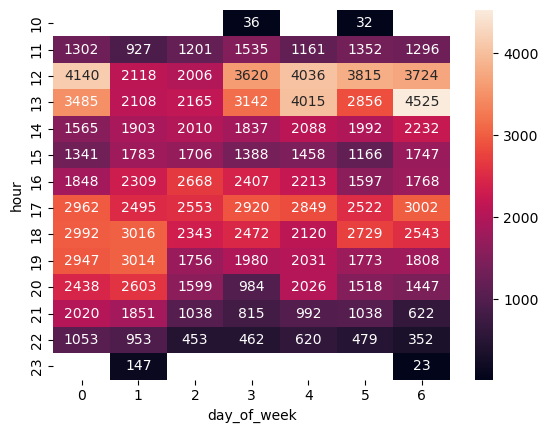

In [244]:
import seaborn as sns

sns.heatmap(
    
(order_items_df
 .pivot_table(
     index='hour',
     columns='day_of_week',
     values='total_revenue',
     aggfunc='sum')
).round(),
    annot=True,
    fmt='g'
    
)